<a href="https://colab.research.google.com/github/lazaroq11/bill_model/blob/master/bill_qa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Dependências***

In [1]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
!pip install transformers
!pip install -U scikit-learn
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 448.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=29800215b5b6aa7e1a2b3226664002697c319e7e61abcb719570c0b3224ab64d
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [4]:
!pip install transformers[torch]
!pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 776.5 kB/s eta 0:00:00


In [5]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.5 MB/s eta 0:00:00


In [6]:
!pip install --upgrade transformers scikit-learn

In [7]:
!pip install huggingface_hub

In [8]:
!pip install nltk

# ***Treinamento***



# **Geração de Texto com GPT-2**

# *Treinamento GPT-2*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader

# Seu DataFrame com textos e rótulos
import pandas as pd
import random
import nltk
nltk.download('wordnet')
from textblob import Word

# Seu DataFrame com textos e rótulos
df = pd.DataFrame({
    "label": ["BILL", "BahiaRT", "python", "AI", "Machine Learning", "NLP", "ACSO", "UNEB", "Yolo", "ROS", "Transformers", "Robocup", "Robôs de Serviço","BILL", "BahiaRT", "python", "AI", "Machine Learning", "NLP", "ACSO", "UNEB", "BahiaRt Multidisciplinar", "Yolo", "ROS", "Transformers", "Robocup", "Robôs de Serviço"],
    "text": ["BILL é um robô de serviço projetado. Ele é um robô humanoide que pode ser usado para uma variedade de tarefas, incluindo atendimento ao cliente, limpeza e segurança. BILL é equipado com uma variedade de sensores e câmeras, que ele usa para navegar pelo ambiente e interagir com humanos. BILL é um produto da BahiaRT, uma equipe de robótica da UNEB. BILL é um dos projetos mais recentes da BahiaRT. BILL é um robô inovador que tem o potencial de melhorar a vida das pessoas. Ele pode ser usado para automatizar tarefas, fornecer assistência aos idosos e deficientes e até mesmo ajudar a salvar vidas.",
            "BahiaRT é uma equipe de robótica da UNEB. A equipe foi fundada em 2007 por um grupo de estudantes e pesquisadores que compartilham o interesse em robótica.",
            "Python é uma linguagem de programação geral de alto nível. É uma linguagem interpretada, o que significa que não precisa ser compilada antes de ser executada. Python é uma linguagem relativamente fácil de aprender e usar.",
            "A inteligência artificial (IA) é uma área da ciência da computação que se concentra no desenvolvimento de sistemas capazes de executar tarefas que normalmente requerem inteligência humana. Ela engloba campos como aprendizado de máquina, visão computacional e processamento de linguagem natural.",
            "A aprendizagem de máquina (Machine Learning) é um subcampo da inteligência artificial que se concentra no desenvolvimento de algoritmos e modelos que permitem que os sistemas aprendam e melhorem com base em dados. É amplamente utilizado em previsões e análise de dados.",
            "O Processamento de Linguagem Natural (NLP) é uma subárea da IA que se concentra na interação entre computadores e linguagem humana. É usado em chatbots, tradução automática e análise de sentimentos, entre outras aplicações.",
            "O ACSO (Núcleo de Arquitetura de Computadores e Sistemas Operacionais), é um grupo de Pesquisa da UNEB, Universidade do Estado da Bahia",
            "A Uneb é uma das maiores universidades da Bahia, multicampi e para todos.Atualmente, a universidade disponibiliza mais de 170 opções de cursos e habilitações nas modalidades presencial e de educação a distância (EaD),[4] nos níveis de graduação e pós-graduação, oferecidos nos 29 Departamentos. Vale destacar, nessa seara, o expressivo crescimento na oferta de cursos stricto sensu (mestrados e doutorados) nos últimos anos, em Salvador  e outras cidades, promovendo a interiorização da pós-graduação pública, gratuita e de qualidade.Além dos câmpus, a UNEB está presente na quase totalidade dos 417 municípios do estado, por intermédio de programas e ações extensionistas em convênio com organizações públicas e privadas, que beneficiam milhões de cidadãos baianos, a maioria pertencente a segmentos social e economicamente desfavorecidos e excluídos. Alfabetização e capacitação de jovens e adultos em situação de risco social; educação em assentamentos da reforma agrária e em comunidades indígenas e quilombolas; projetos de inclusão e valorização voltados para pessoas deficientes, da terceira idade, LGBT, entre outros, são algumas das iniciativas que aproximam a universidade da sociedade.A UNEB desenvolve também importantes pesquisas em todas as regiões em que atua. Alguns projetos trazem a marca da vanguarda acadêmica, a exemplo dos trabalhos nas áreas de robótica e de jogos eletrônicos pedagógicos, com os quais já conquistou premiações e o reconhecimento nacional e internacional. O corpo discente da instituição é estimulado a participar das pesquisas por meio de programas de iniciação científica e de concessão de bolsas de monitoria.Com o apoio de sua comunidade acadêmica, dos muitos parceiros e da sociedade, a UNEB reafirma, a cada dia, seu compromisso de continuar trilhando o caminho que alia a excelência acadêmica à sua missão social, contribuindo, assim, para o desenvolvimento socioeducacional e econômico da Bahia e do país.[3]",
            "A BahiaRT é uma equipe multidisciplinar que inclui estudantes de engenharia, ciência da computação e design. A BahiaRT tem trabalhado em uma variedade de projetos de robótica, incluindo Bill, um robô de serviço humanoide. A equipe também está trabalhando em um robô de resgate que pode ser usado em situações de emergência. A BahiaRT é uma equipe ativa que está constantemente desenvolvendo novos projetos de robótica. A equipe está comprometida em usar a robótica para melhorar a vida das pessoas.",
            "O Yolo é um algoritmo de AI, utilizado para detecção de pessoas e objetos, BILL utiliza esse algoritmo para executar tarefas relacionadas a isso",
            "Robot Operating System é uma coleção de frameworks de software para desenvolvimento de robôs, que fornece a funcionalidade de um sistema operacional em um cluster de computadores heterogêneo",
             "As redes neurais Transformers são uma arquitetura de rede neural profunda que se destacou no processamento de linguagem natural e em diversas outras áreas. Elas usam um mecanismo de atenção para capturar relações complexas entre elementos em uma sequência de dados, permitindo a modelagem eficaz de dependências de longo alcance. Essas redes são pré-treinadas em grandes conjuntos de dados, adquirindo amplo conhecimento da linguagem e, em seguida, finamente ajustadas para tarefas específicas com conjuntos de dados menores, tornando o transfer learning eficaz e acessível. Essa abordagem é amplamente aplicável, sendo usada com sucesso em tarefas de NLP, visão computacional, áudio e outros domínios, tornando-se uma das arquiteturas mais influentes na aprendizagem profunda.",
             "A RoboCup é uma competição internacional de robótica que visa promover a pesquisa e o desenvolvimento de sistemas autônomos e inteligentes. Fundada em 1997, a competição tem como objetivo principal avançar a tecnologia de robôs autônomos, incentivando a inovação em áreas como visão computacional, aprendizado de máquina, planejamento de movimento e interação homem-máquina. A competição envolve diversas categorias, incluindo robôs que jogam futebol, realizam resgates em situações de desastre e executam tarefas domésticas. A RoboCup também serve como plataforma para promover a educação em robótica e inteligência artificial, envolvendo equipes de estudantes e pesquisadores de todo o mundo. Ela desempenha um papel crucial no avanço da robótica autônoma e na promoção da colaboração global na área.",
             "Robôs de serviço representam uma categoria crescente e inovadora de autômatos projetados para desempenhar uma variedade de tarefas em ambientes domésticos, comerciais e industriais. Esses robôs são projetados para tornar a vida mais conveniente e eficiente, oferecendo assistência em diversas áreas, desde a limpeza e segurança até a entrega de alimentos em restaurantes.",
             "BILL é um robô de serviço projetado. Ele é um robô humanoide que pode ser usado para uma variedade de tarefas, incluindo atendimento ao cliente, limpeza e segurança. BILL é equipado com uma variedade de sensores e câmeras, que ele usa para navegar pelo ambiente e interagir com humanos. BILL é um produto da BahiaRT, uma equipe de robótica da UNEB. BILL é um dos projetos mais recentes da BahiaRT. BILL é um robô inovador que tem o potencial de melhorar a vida das pessoas. Ele pode ser usado para automatizar tarefas, fornecer assistência aos idosos e deficientes e até mesmo ajudar a salvar vidas.",
            "BahiaRT é uma equipe de robótica da UNEB. A equipe foi fundada em 2007 por um grupo de estudantes e pesquisadores que compartilham o interesse em robótica.",
            "Python é uma linguagem de programação geral de alto nível. É uma linguagem interpretada, o que significa que não precisa ser compilada antes de ser executada. Python é uma linguagem relativamente fácil de aprender e usar.",
            "A inteligência artificial (IA) é uma área da ciência da computação que se concentra no desenvolvimento de sistemas capazes de executar tarefas que normalmente requerem inteligência humana. Ela engloba campos como aprendizado de máquina, visão computacional e processamento de linguagem natural.",
            "A aprendizagem de máquina (Machine Learning) é um subcampo da inteligência artificial que se concentra no desenvolvimento de algoritmos e modelos que permitem que os sistemas aprendam e melhorem com base em dados. É amplamente utilizado em previsões e análise de dados.",
            "O Processamento de Linguagem Natural (NLP) é uma subárea da IA que se concentra na interação entre computadores e linguagem humana. É usado em chatbots, tradução automática e análise de sentimentos, entre outras aplicações.",
            "O ACSO (Núcleo de Arquitetura de Computadores e Sistemas Operacionais), é um grupo de Pesquisa da UNEB, Universidade do Estado da Bahia",
            "A Uneb é uma das maiores universidades da Bahia, multicampi e para todos.Foi fundada em 1983 e mantida pelo Governo do Estado por intermédio da Secretaria da Educação do Estado da Bahia (SEC), está presente geograficamente em todas as regiões do Estado, estruturada no sistema multicampi.A capilaridade de sua estrutura e abrangência de suas atividades está diretamente relacionada à missão social que desempenha. A UNEB possui 31 Departamentos instalados em 26 campi: um sediado na capital do estado, onde se localiza a administração central da instituição, e os demais distribuídos em 25 importantes municípios baianos de porte médio e grande.Atualmente, a universidade disponibiliza mais de 170 opções de cursos e habilitações nas modalidades presencial e de educação a distância (EaD) nos níveis de graduação e pós-graduação, oferecidos nos 29 Departamentos. Vale destacar, nessa seara, o expressivo crescimento na oferta de cursos stricto sensu (mestrados e doutorados) nos últimos anos, em Salvador  e outras cidades, promovendo a interiorização da pós-graduação pública, gratuita e de qualidade.Além dos câmpus, a UNEB está presente na quase totalidade dos 417 municípios do estado, por intermédio de programas e ações extensionistas em convênio com organizações públicas e privadas, que beneficiam milhões de cidadãos baianos, a maioria pertencente a segmentos social e economicamente desfavorecidos e excluídos. Alfabetização e capacitação de jovens e adultos em situação de risco social; educação em assentamentos da reforma agrária e em comunidades indígenas e quilombolas; projetos de inclusão e valorização voltados para pessoas deficientes, da terceira idade, LGBT, entre outros, são algumas das iniciativas que aproximam a universidade da sociedade.A UNEB desenvolve também importantes pesquisas em todas as regiões em que atua. Alguns projetos trazem a marca da vanguarda acadêmica, a exemplo dos trabalhos nas áreas de robótica e de jogos eletrônicos pedagógicos, com os quais já conquistou premiações e o reconhecimento nacional e internacional. O corpo discente da instituição é estimulado a participar das pesquisas por meio de programas de iniciação científica e de concessão de bolsas de monitoria.Com o apoio de sua comunidade acadêmica, dos muitos parceiros e da sociedade, a UNEB reafirma, a cada dia, seu compromisso de continuar trilhando o caminho que alia a excelência acadêmica à sua missão social, contribuindo, assim, para o desenvolvimento socioeducacional e econômico da Bahia e do país.",
            "O Yolo é um algoritmo de AI, utilizado para detecção de pessoas e objetos, BILL utiliza esse algoritmo para executar tarefas relacionadas a isso",
            "Robot Operating System é uma coleção de frameworks de software para desenvolvimento de robôs, que fornece a funcionalidade de um sistema operacional em um cluster de computadores heterogêneo",
             "As redes neurais Transformers são uma arquitetura de rede neural profunda que se destacou no processamento de linguagem natural e em diversas outras áreas. Elas usam um mecanismo de atenção para capturar relações complexas entre elementos em uma sequência de dados, permitindo a modelagem eficaz de dependências de longo alcance. Essas redes são pré-treinadas em grandes conjuntos de dados, adquirindo amplo conhecimento da linguagem e, em seguida, finamente ajustadas para tarefas específicas com conjuntos de dados menores, tornando o transfer learning eficaz e acessível. Essa abordagem é amplamente aplicável, sendo usada com sucesso em tarefas de NLP, visão computacional, áudio e outros domínios, tornando-se uma das arquiteturas mais influentes na aprendizagem profunda.",
             "A RoboCup é uma competição internacional de robótica que visa promover a pesquisa e o desenvolvimento de sistemas autônomos e inteligentes. Fundada em 1997, a competição tem como objetivo principal avançar a tecnologia de robôs autônomos, incentivando a inovação em áreas como visão computacional, aprendizado de máquina, planejamento de movimento e interação homem-máquina. A competição envolve diversas categorias, incluindo robôs que jogam futebol, realizam resgates em situações de desastre e executam tarefas domésticas. A RoboCup também serve como plataforma para promover a educação em robótica e inteligência artificial, envolvendo equipes de estudantes e pesquisadores de todo o mundo. Ela desempenha um papel crucial no avanço da robótica autônoma e na promoção da colaboração global na área.",
             "Robôs de serviço representam uma categoria crescente e inovadora de autômatos projetados para desempenhar uma variedade de tarefas em ambientes domésticos, comerciais e industriais. Esses robôs são projetados para tornar a vida mais conveniente e eficiente, oferecendo assistência em diversas áreas, desde a limpeza e segurança até a entrega de alimentos em restaurantes."]
})

# Concatene o DataFrame original várias vezes para aumentar a quantidade de dados
n_copies = 10  # Defina o número de vezes que você deseja replicar o DataFrame
df = pd.concat([df] * n_copies, ignore_index=True)
# Dividir o DataFrame em treinamento e teste
train_df, test_df = train_test_split(df, test_size=0.2)

# Carregar o tokenizador e modelo pré-treinado GPT-2
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-large')
model = GPT2LMHeadModel.from_pretrained('gpt2-large')

# Defina um token de padding
tokenizer.pad_token = tokenizer.eos_token

# Defina o tamanho do lote e crie um DataLoader personalizado para treinamento
class TextDataset(Dataset):
    def __init__(self, df, tokenizer):
        self.texts = df['text'].values
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        inputs = self.tokenizer(self.texts[idx], return_tensors='pt', padding='max_length', max_length=128, truncation=True)
        return inputs

train_dataset = TextDataset(train_df, tokenizer)
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Configurar otimizador e agendador de taxa de aprendizado
optimizer = AdamW(model.parameters(), lr=2e-4, weight_decay=0.05)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * 10)

# Adicione dropout como técnica de regularização
model.config.dropout = 0.2

# Treinamento
model.train()
for epoch in range(15):
    total_loss = 0.0
    for batch in train_dataloader:
        optimizer.zero_grad()
        inputs = batch["input_ids"]
        loss = model(inputs, labels=inputs).loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {total_loss / len(train_dataloader)}')

    # Gere texto de exemplo após algumas épocas
    if (epoch + 1) % 5 == 0:
        model.eval()
        prompt = "UNEB"
        prompt_ids = tokenizer(prompt, return_tensors='pt').input_ids
        generated_text = model.generate(prompt_ids, max_length=1024, num_return_sequences=1, no_repeat_ngram_size=2)
        print(f'Texto gerado na época {epoch + 1}:')
        print(tokenizer.decode(generated_text[0], skip_special_tokens=True))
        model.train()

# Salvar o modelo fine-tunado
model.save_pretrained("fine_tuned_gpt2")
tokenizer.save_pretrained("fine_tuned_gpt2")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# *Inferência GPT2*


In [ ]:

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Carregar o modelo fine-tunado
fine_tuned_model = GPT2LMHeadModel.from_pretrained("fine_tuned_gpt2")
fine_tuned_tokenizer = GPT2Tokenizer.from_pretrained("fine_tuned_gpt2")

# Exemplo de inferência com temperatura definida
prompt = "O que é o BILL"
input_ids = fine_tuned_tokenizer.encode(prompt, return_tensors='pt')
temperature = 0.2  # Ajuste o valor de temperatura conforme desejado
max_output_length = 60  # Ajuste o comprimento máximo da saída

with torch.no_grad():
    output = fine_tuned_model.generate(input_ids, max_length=max_output_length, num_return_sequences=1, no_repeat_ngram_size=2, temperature=temperature)
generated_text = fine_tuned_tokenizer.decode(output[0], skip_special_tokens=True)

print("Texto gerado:")
print(generated_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Texto gerado:
O que é o BILL é uma linguagem de programação geral de alto nível. É uMA linguaggi e o desenvolvimento de sistemas autônomos, incentivando a inovações e


# ***Métrica Rouge***

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import pandas as pd
import nltk
from rouge_score import rouge_scorer

nltk.download('punkt')

# Carregar o tokenizador e o modelo pré-treinado GPT-2
tokenizer = GPT2Tokenizer.from_pretrained('fine_tuned_gpt2')
model = GPT2LMHeadModel.from_pretrained('fine_tuned_gpt2')  # Carregue o modelo fine-tunado

# Seu DataFrame de teste
test_df = pd.DataFrame({
    "label": ["BILL", "BahiaRT", "python", "AI", "Machine Learning", "NLP", "ACSO", "UNEB", "BahiaRt Multidisciplinar", "Yolo", "ROS", "Transformers", "Robocup", "Robôs de Serviço"],
    "text": ["BILL é um robô de serviço projetado. Ele é um robô humanoide que pode ser usado para uma variedade de tarefas, incluindo atendimento ao cliente, limpeza e segurança. BILL é equipado com uma variedade de sensores e câmeras, que ele usa para navegar pelo ambiente e interagir com humanos. BILL é um produto da BahiaRT, uma equipe de robótica da UNEB. BILL é um dos projetos mais recentes da BahiaRT. BILL é um robô inovador que tem o potencial de melhorar a vida das pessoas. Ele pode ser usado para automatizar tarefas, fornecer assistência aos idosos e deficientes e até mesmo ajudar a salvar vidas.",
            "BahiaRT é uma equipe de robótica da UNEB. A equipe foi fundada em 2007 por um grupo de estudantes e pesquisadores que compartilham o interesse em robótica.",
            "Python é uma linguagem de programação geral de alto nível. É uma linguagem interpretada, o que significa que não precisa ser compilada antes de ser executada. Python é uma linguagem relativamente fácil de aprender e usar.",
            "A inteligência artificial (IA) é uma área da ciência da computação que se concentra no desenvolvimento de sistemas capazes de executar tarefas que normalmente requerem inteligência humana. Ela engloba campos como aprendizado de máquina, visão computacional e processamento de linguagem natural.",
            "A aprendizagem de máquina (Machine Learning) é um subcampo da inteligência artificial que se concentra no desenvolvimento de algoritmos e modelos que permitem que os sistemas aprendam e melhorem com base em dados. É amplamente utilizado em previsões e análise de dados.",
            "O Processamento de Linguagem Natural (NLP) é uma subárea da IA que se concentra na interação entre computadores e linguagem humana. É usado em chatbots, tradução automática e análise de sentimentos, entre outras aplicações.",
            "O ACSO (Núcleo de Arquitetura de Computadores e Sistemas Operacionais), é um grupo de Pesquisa da UNEB, Universidade do Estado da Bahia",
            "A Uneb é uma das maiores universidades da Bahia, multicampi e para todos.",
            "A BahiaRT é uma equipe multidisciplinar que inclui estudantes de engenharia, ciência da computação e design. A BahiaRT tem trabalhado em uma variedade de projetos de robótica, incluindo Bill, um robô de serviço humanoide. A equipe também está trabalhando em um robô de resgate que pode ser usado em situações de emergência. A BahiaRT é uma equipe ativa que está constantemente desenvolvendo novos projetos de robótica. A equipe está comprometida em usar a robótica para melhorar a vida das pessoas.",
            "O Yolo é um algoritmo de AI, utilizado para detecção de pessoas e objetos, BILL utiliza esse algoritmo para executar tarefas relacionadas a isso",
            "Robot Operating System é uma coleção de frameworks de software para desenvolvimento de robôs, que fornece a funcionalidade de um sistema operacional em um cluster de computadores heterogêneo",
             "As redes neurais Transformers são uma arquitetura de rede neural profunda que se destacou no processamento de linguagem natural e em diversas outras áreas. Elas usam um mecanismo de atenção para capturar relações complexas entre elementos em uma sequência de dados, permitindo a modelagem eficaz de dependências de longo alcance. Essas redes são pré-treinadas em grandes conjuntos de dados, adquirindo amplo conhecimento da linguagem e, em seguida, finamente ajustadas para tarefas específicas com conjuntos de dados menores, tornando o transfer learning eficaz e acessível. Essa abordagem é amplamente aplicável, sendo usada com sucesso em tarefas de NLP, visão computacional, áudio e outros domínios, tornando-se uma das arquiteturas mais influentes na aprendizagem profunda.",
             "A RoboCup é uma competição internacional de robótica que visa promover a pesquisa e o desenvolvimento de sistemas autônomos e inteligentes. Fundada em 1997, a competição tem como objetivo principal avançar a tecnologia de robôs autônomos, incentivando a inovação em áreas como visão computacional, aprendizado de máquina, planejamento de movimento e interação homem-máquina. A competição envolve diversas categorias, incluindo robôs que jogam futebol, realizam resgates em situações de desastre e executam tarefas domésticas. A RoboCup também serve como plataforma para promover a educação em robótica e inteligência artificial, envolvendo equipes de estudantes e pesquisadores de todo o mundo. Ela desempenha um papel crucial no avanço da robótica autônoma e na promoção da colaboração global na área.",
             "Robôs de serviço representam uma categoria crescente e inovadora de autômatos projetados para desempenhar uma variedade de tarefas em ambientes domésticos, comerciais e industriais. Esses robôs são projetados para tornar a vida mais conveniente e eficiente, oferecendo assistência em diversas áreas, desde a limpeza e segurança até a entrega de alimentos em restaurantes."]
})

# Função para gerar texto usando o modelo fine-tunado
def generate_text(prompt, model, tokenizer):
    prompt_ids = tokenizer(prompt, return_tensors='pt').input_ids
    generated_text = model.generate(prompt_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2)
    return tokenizer.decode(generated_text[0], skip_special_tokens=True)

# Função para calcular as métricas ROUGE
def calculate_rouge_scores(model, tokenizer, test_df):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = {"rouge1": {"precision": 0, "recall": 0, "f1": 0},
                    "rouge2": {"precision": 0, "recall": 0, "f1": 0},
                    "rougeL": {"precision": 0, "recall": 0, "f1": 0}}

    for index, row in test_df.iterrows():
        reference_text = row["text"]
        generated_text = generate_text(row["label"], model, tokenizer)

        scores = scorer.score(reference_text, generated_text)

        for metric in ["rouge1", "rouge2", "rougeL"]:
            rouge_scores[metric]["precision"] += scores[metric].precision
            rouge_scores[metric]["recall"] += scores[metric].recall

    for metric in rouge_scores:
        rouge_scores[metric]["precision"] /= len(test_df)
        rouge_scores[metric]["recall"] /= len(test_df)
        p = rouge_scores[metric]["precision"]
        r = rouge_scores[metric]["recall"]
        if p + r > 0:
            f1 = (2 * p * r) / (p + r)
            rouge_scores[metric]["f1"] = f1

    return rouge_scores

# Avaliar o modelo e obter as métricas ROUGE
model.eval()
rouge_scores = calculate_rouge_scores(model, tokenizer, test_df)

print("ROUGE Scores:")
for metric in rouge_scores:
    print(f"{metric}:")
    print(f"Precision: {rouge_scores[metric]['precision']}")
    print(f"Recall: {rouge_scores[metric]['recall']}")
    print(f"F1-score: {rouge_scores[metric]['f1']}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `a

ROUGE Scores:
rouge1:
Precision: 0.707914249848585
Recall: 0.43843955860324196
F1-score: 0.5415040434187238
rouge2:
Precision: 0.46134066874613094
Recall: 0.35544835356710097
F1-score: 0.4015303258482617
rougeL:
Precision: 0.656803554614144
Recall: 0.3979621131168648
F1-score: 0.49562275013974366


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

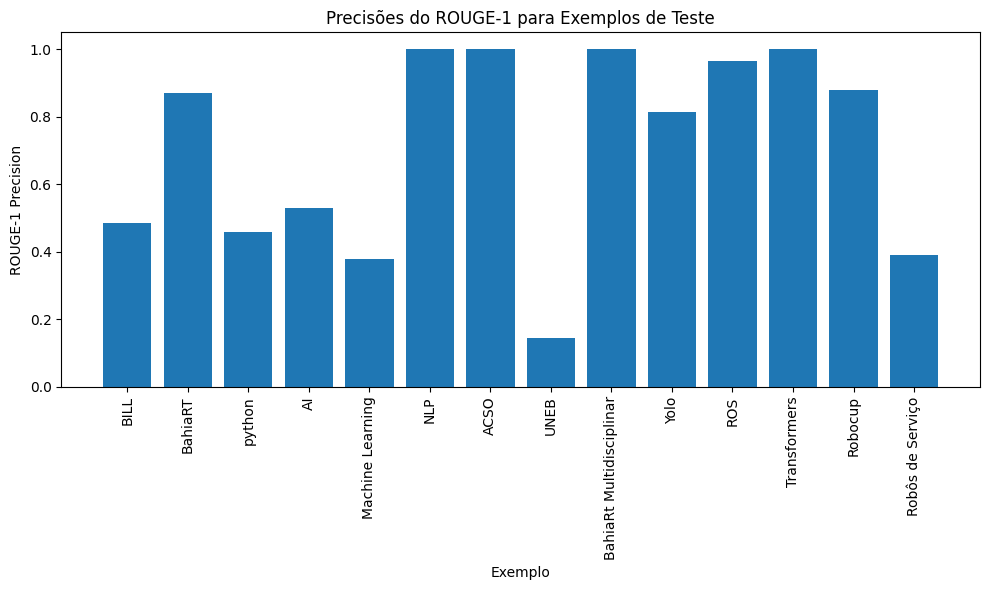

In [ ]:
import matplotlib.pyplot as plt

# Função para calcular as métricas ROUGE e armazenar as precisões em uma lista
def calculate_rouge_scores(model, tokenizer, test_df):
    scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
    rouge_precisions = []  # Lista para armazenar as precisões do ROUGE-1

    for index, row in test_df.iterrows():
        reference_text = row["text"]
        generated_text = generate_text(row["label"], model, tokenizer)

        scores = scorer.score(reference_text, generated_text)
        rouge_precisions.append(scores['rouge1'].precision)

    return rouge_precisions

# Avaliar o modelo e obter as precisões do ROUGE-1
model.eval()
rouge_precisions = calculate_rouge_scores(model, tokenizer, test_df)

# Gerar um gráfico de barras das precisões do ROUGE-1
plt.figure(figsize=(10, 6))
plt.bar(range(len(rouge_precisions)), rouge_precisions)
plt.xlabel("Exemplo")
plt.ylabel("ROUGE-1 Precision")
plt.title("Precisões do ROUGE-1 para Exemplos de Teste")
plt.xticks(range(len(rouge_precisions)), test_df["label"], rotation=90)
plt.tight_layout()

plt.show()


# ***Métrica BLEU***

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `a

[0.0384787482721271, 0.7581396132781355, 0.2981531237267973, 0.11662752930835805, 3.163078396268057e-155, 2.1038924219686138e-248, 0.9607894391523232, 1.2440406169230686e-237, 0.13819104523503795, 0.759907656827929, 0.8921154410192976, 2.5585421000593613e-285, 0.08468706623884811, 6.659806671546155e-156]


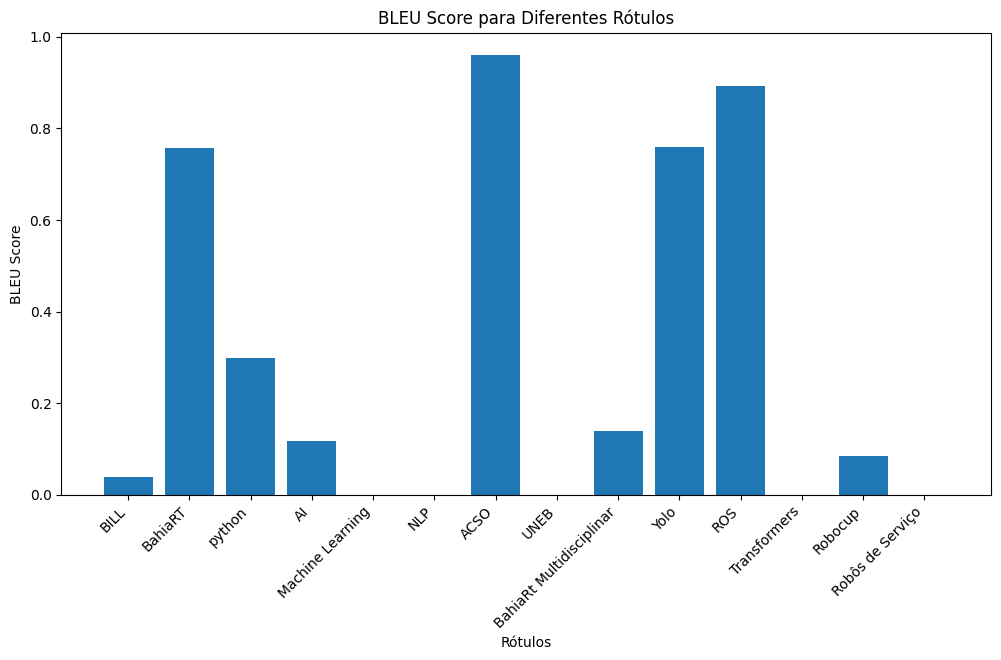

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import pandas as pd
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
import matplotlib.pyplot as plt

nltk.download('punkt')

# Carregar o tokenizador e o modelo pré-treinado GPT-2
tokenizer = GPT2Tokenizer.from_pretrained('fine_tuned_gpt2')
model = GPT2LMHeadModel.from_pretrained('fine_tuned_gpt2')  # Carregue o modelo fine-tunado

# Seu DataFrame de teste
test_df = pd.DataFrame({
    "label": ["BILL", "BahiaRT", "python", "AI", "Machine Learning", "NLP", "ACSO", "UNEB", "BahiaRt Multidisciplinar", "Yolo", "ROS", "Transformers", "Robocup", "Robôs de Serviço"],
    "text": ["BILL é um robô de serviço projetado. Ele é um robô humanoide que pode ser usado para uma variedade de tarefas, incluindo atendimento ao cliente, limpeza e segurança. BILL é equipado com uma variedade de sensores e câmeras, que ele usa para navegar pelo ambiente e interagir com humanos. BILL é um produto da BahiaRT, uma equipe de robótica da UNEB. BILL é um dos projetos mais recentes da BahiaRT. BILL é um robô inovador que tem o potencial de melhorar a vida das pessoas. Ele pode ser usado para automatizar tarefas, fornecer assistência aos idosos e deficientes e até mesmo ajudar a salvar vidas.",
            "BahiaRT é uma equipe de robótica da UNEB. A equipe foi fundada em 2007 por um grupo de estudantes e pesquisadores que compartilham o interesse em robótica.",
            "Python é uma linguagem de programação geral de alto nível. É uma linguagem interpretada, o que significa que não precisa ser compilada antes de ser executada. Python é uma linguagem relativamente fácil de aprender e usar.",
            "A inteligência artificial (IA) é uma área da ciência da computação que se concentra no desenvolvimento de sistemas capazes de executar tarefas que normalmente requerem inteligência humana. Ela engloba campos como aprendizado de máquina, visão computacional e processamento de linguagem natural.",
            "A aprendizagem de máquina (Machine Learning) é um subcampo da inteligência artificial que se concentra no desenvolvimento de algoritmos e modelos que permitem que os sistemas aprendam e melhorem com base em dados. É amplamente utilizado em previsões e análise de dados.",
            "O Processamento de Linguagem Natural (NLP) é uma subárea da IA que se concentra na interação entre computadores e linguagem humana. É usado em chatbots, tradução automática e análise de sentimentos, entre outras aplicações.",
            "O ACSO (Núcleo de Arquitetura de Computadores e Sistemas Operacionais), é um grupo de Pesquisa da UNEB, Universidade do Estado da Bahia",
            "A Uneb é uma das maiores universidades da Bahia, multicampi e para todos.Atualmente, a universidade disponibiliza mais de 170 opções de cursos e habilitações nas modalidades presencial e de educação a distância (EaD),[4] nos níveis de graduação e pós-graduação, oferecidos nos 29 Departamentos. Vale destacar, nessa seara, o expressivo crescimento na oferta de cursos stricto sensu (mestrados e doutorados) nos últimos anos, em Salvador  e outras cidades, promovendo a interiorização da pós-graduação pública, gratuita e de qualidade.Além dos câmpus, a UNEB está presente na quase totalidade dos 417 municípios do estado, por intermédio de programas e ações extensionistas em convênio com organizações públicas e privadas, que beneficiam milhões de cidadãos baianos, a maioria pertencente a segmentos social e economicamente desfavorecidos e excluídos. Alfabetização e capacitação de jovens e adultos em situação de risco social; educação em assentamentos da reforma agrária e em comunidades indígenas e quilombolas; projetos de inclusão e valorização voltados para pessoas deficientes, da terceira idade, LGBT, entre outros, são algumas das iniciativas que aproximam a universidade da sociedade.A UNEB desenvolve também importantes pesquisas em todas as regiões em que atua. Alguns projetos trazem a marca da vanguarda acadêmica, a exemplo dos trabalhos nas áreas de robótica e de jogos eletrônicos pedagógicos, com os quais já conquistou premiações e o reconhecimento nacional e internacional. O corpo discente da instituição é estimulado a participar das pesquisas por meio de programas de iniciação científica e de concessão de bolsas de monitoria.Com o apoio de sua comunidade acadêmica, dos muitos parceiros e da sociedade, a UNEB reafirma, a cada dia, seu compromisso de continuar trilhando o caminho que alia a excelência acadêmica à sua missão social, contribuindo, assim, para o desenvolvimento socioeducacional e econômico da Bahia e do país.[3]",
            "A BahiaRT é uma equipe multidisciplinar que inclui estudantes de engenharia, ciência da computação e design. A BahiaRT tem trabalhado em uma variedade de projetos de robótica, incluindo Bill, um robô de serviço humanoide. A equipe também está trabalhando em um robô de resgate que pode ser usado em situações de emergência. A BahiaRT é uma equipe ativa que está constantemente desenvolvendo novos projetos de robótica. A equipe está comprometida em usar a robótica para melhorar a vida das pessoas.",
            "O Yolo é um algoritmo de AI, utilizado para detecção de pessoas e objetos, BILL utiliza esse algoritmo para executar tarefas relacionadas a isso",
            "Robot Operating System é uma coleção de frameworks de software para desenvolvimento de robôs, que fornece a funcionalidade de um sistema operacional em um cluster de computadores heterogêneo",
             "As redes neurais Transformers são uma arquitetura de rede neural profunda que se destacou no processamento de linguagem natural e em diversas outras áreas. Elas usam um mecanismo de atenção para capturar relações complexas entre elementos em uma sequência de dados, permitindo a modelagem eficaz de dependências de longo alcance. Essas redes são pré-treinadas em grandes conjuntos de dados, adquirindo amplo conhecimento da linguagem e, em seguida, finamente ajustadas para tarefas específicas com conjuntos de dados menores, tornando o transfer learning eficaz e acessível. Essa abordagem é amplamente aplicável, sendo usada com sucesso em tarefas de NLP, visão computacional, áudio e outros domínios, tornando-se uma das arquiteturas mais influentes na aprendizagem profunda.",
             "A RoboCup é uma competição internacional de robótica que visa promover a pesquisa e o desenvolvimento de sistemas autônomos e inteligentes. Fundada em 1997, a competição tem como objetivo principal avançar a tecnologia de robôs autônomos, incentivando a inovação em áreas como visão computacional, aprendizado de máquina, planejamento de movimento e interação homem-máquina. A competição envolve diversas categorias, incluindo robôs que jogam futebol, realizam resgates em situações de desastre e executam tarefas domésticas. A RoboCup também serve como plataforma para promover a educação em robótica e inteligência artificial, envolvendo equipes de estudantes e pesquisadores de todo o mundo. Ela desempenha um papel crucial no avanço da robótica autônoma e na promoção da colaboração global na área.",
             "Robôs de serviço representam uma categoria crescente e inovadora de autômatos projetados para desempenhar uma variedade de tarefas em ambientes domésticos, comerciais e industriais. Esses robôs são projetados para tornar a vida mais conveniente e eficiente, oferecendo assistência em diversas áreas, desde a limpeza e segurança até a entrega de alimentos em restaurantes."]
})

# Função para gerar texto usando o modelo fine-tunado
def generate_text(prompt, model, tokenizer):
    prompt_ids = tokenizer(prompt, return_tensors='pt').input_ids
    generated_text = model.generate(prompt_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2)
    return tokenizer.decode(generated_text[0], skip_special_tokens=True)

# Função para calcular os scores BLEU
def calculate_bleu_scores(model, tokenizer, test_df):
    bleu_scores = []

    for index, row in test_df.iterrows():
        reference_text = row["text"]
        generated_text = generate_text(row["label"], model, tokenizer)

        reference_tokens = nltk.word_tokenize(reference_text)
        generated_tokens = nltk.word_tokenize(generated_text)

        # Calcula o BLEU Score para a referência e a previsão
        bleu = sentence_bleu([reference_tokens], generated_tokens)

        bleu_scores.append(bleu)

    return bleu_scores

# Avaliar o modelo e obter os scores BLEU
model.eval()
bleu_scores = calculate_bleu_scores(model, tokenizer, test_df)
print(bleu_scores)

# Plotar os scores BLEU em um gráfico
labels = test_df["label"]
plt.figure(figsize=(12, 6))
plt.bar(labels, bleu_scores)
plt.xlabel("Rótulos")
plt.ylabel("BLEU Score")
plt.title("BLEU Score para Diferentes Rótulos")
plt.xticks(rotation=45, ha="right")
plt.show()


# **QA com BERT**

In [9]:
from tensorboard import notebook
notebook.list()

No known TensorBoard instances running.


In [10]:
!kill 15404

/bin/bash: line 1: kill: (15404) - No such process


In [11]:
notebook.display(port=6006, height=1000)

<IPython.core.display.Javascript object>

In [14]:
!tensorboard dev upload \
  --logdir "/content/runs" \
  --name "(BertQA2)" \
  --description "BertQA for Robotics" \
  --one_shot

2023-10-24 02:55:03.491633: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 02:55:03.491716: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-24 02:55:03.491831: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-24 02:55:05.596202: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

****************************************************************
****************************************************************
****************************************************************

NOTICE - ACTION REQUIRED: TensorBoard.dev

In [16]:
%load_ext tensorboard
%tensorboard --logdir=runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3067), started 0:01:31 ago. (Use '!kill 3067' to kill it.)

<IPython.core.display.Javascript object>

In [39]:
import pandas as pd
import torch
import torch.nn as nn
from transformers import DistilBertForQuestionAnswering, DistilBertTokenizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt  # Importe a biblioteca Matplotlib

# Crie o conjunto de dados de perguntas e respostas sobre Valorant.
# Triplique o conjunto de dados sobre Valorant.
df = pd.DataFrame({
    "Pergunta": [
        "Como funcionam os robôs autônomos na indústria?",
        "Quais são os sensores mais comuns em robótica?",
        "Qual é a história da robótica industrial?",
        "Quais são as estratégias de navegação em robôs móveis?",
        "Qual é o melhor design para um robô de serviço?",
        "Como usar efetivamente a visão computacional em robótica?",
        "Quais são as diferenças entre robôs industriais e robôs colaborativos?",
        "Como funciona o aprendizado de máquina em robótica?",
        "Quais são as habilidades de um robô autônomo?",
        "Como economizar energia em robôs móveis?",
        "Quais são os melhores algoritmos de localização para robôs?",
        "Como prever o comportamento de robôs em ambientes dinâmicos?",
        "Quais são as estratégias para otimizar a produção em robótica industrial?",
        "Qual é a função de um manipulador robótico?",
        "Quais são os melhores atuadores para movimento em robótica?",
        "Como usar os sensores táteis em robótica de forma eficaz?",
        "Quais são as dicas para programar robôs colaborativos?",
        "Como identificar a melhor solução robótica para uma tarefa específica?",
        "Quais são as características de uma interface homem-máquina eficaz em robótica?",
        "Como funciona o sistema de simulação em robótica?"
    ],
    "Resposta": [
        "Os robôs autônomos na indústria operam de forma independente, tomando decisões com base em sensores e algoritmos.",
        "Sensores comuns em robótica incluem câmeras, sensores de proximidade e sensores inerciais.",
        "A história da robótica industrial remonta a meados do século 20, com o surgimento dos primeiros robôs industriais.",
        "Estratégias de navegação em robôs móveis podem envolver SLAM (Simultaneous Localization and Mapping) e planejamento de trajetória.",
        "O design de um robô de serviço depende da aplicação, com considerações de mobilidade, alcance e carga útil.",
        "A visão computacional é essencial para a percepção visual em robótica, permitindo que os robôs entendam o ambiente.",
        "Robôs industriais são usados em ambientes de produção, enquanto robôs colaborativos interagem com humanos de forma segura.",
        "O aprendizado de máquina em robótica permite que os robôs aprendam e melhorem suas habilidades com o tempo.",
        "Habilidades de um robô autônomo incluem navegação, interação com objetos e tomada de decisões baseada em dados.",
        "Economizar energia em robôs móveis envolve otimização de baterias e uso eficiente de recursos.",
        "Algoritmos de localização, como o filtro de partículas, são usados para determinar a posição de um robô em um ambiente.",
        "Prever o comportamento de robôs em ambientes dinâmicos requer modelagem e planejamento avançado.",
        "Estratégias de otimização de produção na robótica industrial visam aumentar a eficiência e a qualidade da produção.",
        "Um manipulador robótico é responsável por realizar tarefas de manipulação, como pegar e mover objetos.",
        "Atuadores, como motores elétricos e pneumáticos, são usados para criar movimento em robôs.",
        "Sensores táteis permitem que os robôs detectem e respondam ao toque e à pressão em suas superfícies.",
        "Programar robôs colaborativos requer considerações de segurança e interface de usuário intuitiva.",
        "Escolher a melhor solução robótica envolve avaliar requisitos, orçamento e aplicação específica.",
        "Uma interface homem-máquina eficaz facilita a interação entre humanos e robôs de forma intuitiva.",
        "Sistemas de simulação em robótica permitem testar algoritmos e comportamento de robôs em ambientes virtuais."
    ],
    "Texto": [
        "Os robôs autônomos são essenciais para a automação industrial e a eficiência de processos.",
        "Sensores desempenham um papel fundamental na percepção do ambiente por parte dos robôs.",
        "A robótica industrial tem evoluído ao longo das décadas, transformando a produção em muitas indústrias.",
        "A navegação precisa é crucial para robôs móveis que operam em ambientes dinâmicos.",
        "O design de robôs de serviço varia de acordo com as necessidades da tarefa a ser executada.",
        "A visão computacional permite que os robôs interpretem informações visuais de seu ambiente.",
        "Robôs colaborativos estão se tornando cada vez mais comuns em ambientes de trabalho compartilhados.",
        "O aprendizado de máquina capacita os robôs a melhorarem suas habilidades com base em experiências passadas.",
        "Robôs autônomos podem executar uma ampla gama de tarefas, desde navegação até reconhecimento de objetos.",
        "A eficiência energética é fundamental para prolongar a autonomia dos robôs móveis.",
        "Algoritmos de localização desempenham um papel fundamental na navegação precisa de robôs.",
        "Prever o comportamento de robôs é importante para a segurança e o desempenho em ambientes dinâmicos.",
        "A otimização da produção é um objetivo-chave na automação industrial com robôs.",
        "Manipuladores robóticos desempenham um papel importante na montagem e na manipulação de objetos.",
        "Atuadores são os motores que conferem movimento e ação aos robôs.",
        "Sensores táteis permitem que os robôs percebam e reajam a interações físicas com o ambiente.",
        "Programar robôs colaborativos envolve garantir que eles possam interagir com segurança com humanos.",
        "Escolher a solução robótica certa é crucial para atender às necessidades específicas da aplicação.",
        "Uma interface homem-máquina eficaz facilita a operação e a colaboração entre humanos e robôs.",
        "A simulação é uma ferramenta valiosa para o desenvolvimento e teste de algoritmos robóticos."
    ]
})

# Concatene o DataFrame original várias vezes para aumentar a quantidade de dados
n_copies = 20  # Defina o número de vezes que você deseja replicar o DataFrame
df = pd.concat([df] * n_copies, ignore_index=True)

# Dividir o conjunto de dados em treinamento, validação e teste
train_df, temp_df = train_test_split(df, test_size=0.1, random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Importe o modelo DistilBERT e o tokenizer.
model = DistilBertForQuestionAnswering.from_pretrained("distilbert-base-uncased-distilled-squad")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-distilled-squad")

# Adicione dropout ao modelo
dropout_prob = 0.3  # Defina a probabilidade de dropout (ajuste conforme necessário)
model.distilbert.transformer.layer[-1].output = nn.Sequential(
    nn.Dropout(dropout_prob),
    nn.Linear(model.config.dim, model.config.dim),
    nn.ReLU(),
    nn.Dropout(dropout_prob),
    nn.Linear(model.config.dim, model.config.num_labels)
)

# Faça o ajuste fino (fine-tuning).
train_context = train_df["Texto"]
train_questions = train_df["Pergunta"]
train_answers = train_df["Resposta"]

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)  # Reduzindo a taxa de aprendizado
epochs = 200

# Listas para armazenar métricas de treinamento e validação
train_losses = []
validation_losses = []
accuracies = []

for epoch in range(epochs):
    model.train()
    total_loss = 0.0  # Inicializa a perda total da época como zero

    for i in range(len(train_context)):
        inputs = tokenizer(train_questions.iloc[i], train_context.iloc[i], return_tensors="pt", padding=True, truncation=True)
        outputs = model(**inputs)
        start_scores = outputs.start_logits
        end_scores = outputs.end_logits

        # Calcule a perda com base nas pontuações de início e fim
        loss =  end_scores.mean() + start_scores.mean()
        total_loss += loss.item()

        # Retropropagação e otimização
        optimizer.zero_grad()  # Zera os gradientes antes de retropropagar
        loss.backward()
        optimizer.step()

    # Calcule a perda média da época
    average_loss = total_loss / len(train_context)
    train_losses.append(average_loss)  # Adicione a perda à lista de treinamento
    print(f"Época {epoch + 1}/{epochs}, Perda: {average_loss:.4f}")

    # Valide o modelo no conjunto de validação
    val_context = validation_df["Texto"]
    val_questions = validation_df["Pergunta"]
    val_answers = validation_df["Resposta"]

    token_f1_scores = []
    bleu_scores = []

    for i, val_question in enumerate(val_questions):
        model.eval()  # Mude para o modo de avaliação
        inputs = tokenizer(val_question, val_context.iloc[i], return_tensors="pt", padding=True, truncation=True)
        outputs = model(**inputs)
        start_scores = outputs.start_logits
        end_scores = outputs.end_logits

        # Encontre o índice da resposta prevista
        answer_start = start_scores.argmax()
        answer_end = end_scores.argmax()

        # Obtenha a resposta prevista
        predicted_answer = tokenizer.decode(inputs["input_ids"][0][answer_start:answer_end + 1])

        # Compare com a resposta real e calcule métricas
        true_answer = val_answers.iloc[i]

        # Calcule o token-level F1-score
        predicted_tokens = word_tokenize(predicted_answer)
        true_tokens = word_tokenize(true_answer)
        common_tokens = set(predicted_tokens) & set(true_tokens)
        precision = len(common_tokens) / (len(predicted_tokens) + 1e-10)
        recall = len(common_tokens) / (len(true_tokens) + 1e-10)
        f1 = 2 * (precision * recall) / (precision + recall + 1e-10)

        # Calcule a BLEU score
        bleu = sentence_bleu([true_tokens], predicted_tokens)

        token_f1_scores.append(f1)
        bleu_scores.append(bleu)

        # Calcule a acurácia (pode personalizar essa métrica)
        accuracy = 1.0 if predicted_answer == true_answer else 0.0
        accuracies.append(accuracy)

        print(f"Pergunta de validação após a época {epoch + 1}:")
        print(f"Pergunta: {val_question}")
        print(f"Resposta Real: {true_answer}")
        print(f"Resposta Prevista: {predicted_answer}")
        print(f"Token-level F1-score: {f1:.4f}")
        print(f"BLEU Score: {bleu:.4f}")
        print(f"Acurácia: {accuracy}\n")

    # Calcule as métricas de validação
    average_token_f1 = sum(token_f1_scores) / len(token_f1_scores)
    average_bleu = sum(bleu_scores) / len(bleu_scores)
    accuracy = sum(accuracies) / len(accuracies)

    validation_losses.append(average_loss)  # Adicione a perda à lista de validação
    print(f"Métricas de Validação após a época {epoch + 1}:")
    print(f"Token-level F1-score: {average_token_f1:.4f}")
    print(f"BLEU Score: {average_bleu:.4f}")
    print(f"Acurácia Média: {accuracy:.4f}")

    # Salve o modelo a cada 20 épocas
    if (epoch + 1) % 20 == 0:
        model.save_pretrained(f"valorant_qa_model_epoch{epoch + 1}")
        tokenizer.save_pretrained(f"valorant_qa_model_epoch{epoch + 1}")

# Plote gráficos de perda e acurácia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Treinamento")
plt.plot(range(1, epochs + 1), validation_losses, label="Validação")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.title("Curva de Aprendizado - Perda")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracies, label="Acurácia")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Curva de Aprendizado - Acurácia")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


KeyboardInterrupt: ignored

# Inferência *QABERT*

In [ ]:
from transformers import DistilBertForQuestionAnswering, DistilBertTokenizer

# Carregue o modelo treinado.
model = DistilBertForQuestionAnswering.from_pretrained("valorant_qa_model")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-distilled-squad")

# Função para fazer uma pergunta ao modelo.
def ask_question(context, question):
    inputs = tokenizer(question, context, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    start_scores = outputs.start_logits
    end_scores = outputs.end_logits

    # Encontre os índices de início e fim com base nos scores.
    start_index = torch.argmax(start_scores, dim=1)
    end_index = torch.argmax(end_scores, dim=1) + 1

    # Decodifique a resposta a partir dos índices de início e fim.
    answer = tokenizer.decode(inputs.input_ids[0][start_index[0]:end_index[0]])

    return answer

# Exemplo de pergunta:
question = " Sage?"
context = "A habilidade de cura da Sage é uma importante habilidade para utiliza-la de forma eficaz aproveite quando os aliados estiverem com pouca vida"

# Obtenha a resposta para a pergunta.
answer = ask_question(context, question)
print("Resposta:", answer)


Resposta: 


# ***PUSH NO HUGGING FACE***

In [ ]:
!pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.0 MB/s eta 0:00:00


In [22]:
from huggingface_hub import notebook_login

notebook_login()


In [36]:
from huggingface_hub import trainer
trainer.push_to_hub(repo_name="lazaroq11/billqa2")

ImportError: ignored

In [ ]:
!transformers-cli repo create seu-repo
!transformers-cli repo upload seu-modelo seu-repo